# Infer using saved model

This colab contains the code for inference based on the saved model in the previous notebook

In [1]:
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'D:\\Workdir\\DL_Project'

In [3]:
# todo: add code that loads checkpoint and saves latest model

In [4]:
pic="./datasets/monet2photo/testB/2014-08-04 11_06_56.jpg"

Convert and resize the input image

In [5]:
with open(pic, 'rb') as f:
    content = f.read()
    
original = tf.image.decode_jpeg(content)
resized_original = tf.image.resize(original, (256, 256))
float_original = tf.cast(resized_original, tf.float32)
inputs = float_original / 127.5 - 1
inputs = tf.expand_dims(inputs, 0)

Load the model

In [6]:
imported = tf.saved_model.load("./saved_models/05102020/a2b_monet_to_photo")

In [7]:
outputs = imported(inputs)

Take the first output and normalize it

In [8]:
generated = outputs[0]
generated = (generated + 1) * 127.5
generated = tf.cast(generated, tf.uint8)

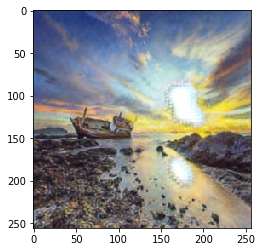

In [9]:
plt.imshow(generated)